# **Проект**




>**Цель**:


*   Провести анализ стоимости недвижимости в зависимости от различных параметров в чудесном городе Эймсе
 

чудесный город Эймс!!!


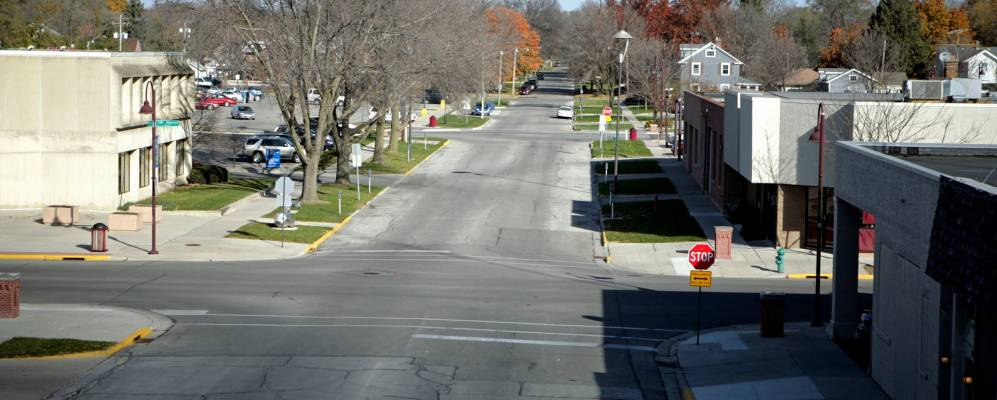

In [6]:
from IPython.display import Image
print("чудесный город Эймс!!!")
Image("0683855c5155d3e350f93f4820b7185a.jpg", width=600, height=300)




Первым делом подключим необходимые библиотеки 

In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go


Подгрузим датасет

Данные взяты из источника Kaggle - https://kaggle.com/competitions/house-prices-advanced-regression-techniques

In [11]:
df = pd.read_csv("train.csv") 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


файл с подробным описанием данных приложу отдельно

а пока получим информацию о датасете

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [43]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

изучим предметно датасет

In [26]:
shape=df.shape
print(f"Размер датасета: {shape[0]}*{shape[1]}")
emptyspace=df.isnull().sum().sum()
print(f"Количество незаполненных ячеек в таблице: {emptyspace}")
full=(116800-df.isnull().sum().sum())*100/116800
print(f"Процент заполненных ячеек в таблице: {full}%")

Размер датасета: 1460*81
Количество незаполненных ячеек в таблице: 7829
Процент заполненных ячеек в таблице: 93.29708904109589%


In [27]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


ух, сколько нулей, воспользуемся .round()

In [30]:
df.describe().round()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.0,57.0,70.0,10517.0,6.0,6.0,1971.0,1985.0,104.0,444.0,...,94.0,47.0,22.0,3.0,15.0,3.0,43.0,6.0,2008.0,180921.0
std,422.0,42.0,24.0,9981.0,1.0,1.0,30.0,21.0,181.0,456.0,...,125.0,66.0,61.0,29.0,56.0,40.0,496.0,3.0,1.0,79443.0
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,366.0,20.0,59.0,7554.0,5.0,5.0,1954.0,1967.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.0,50.0,69.0,9478.0,6.0,5.0,1973.0,1994.0,0.0,384.0,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.0,70.0,80.0,11602.0,7.0,6.0,2000.0,2004.0,166.0,712.0,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


Перед нами таблица с статистическими показателями по каждой колонке датасета: среднее, максимальное/минимальное значение, стандартное отклонение и тд...

Теперь перейдем к нашему предмету изучения - а именно к цене недвижимости!
И пожалуй начнем с гистограммы!!


<Axes: xlabel='SalePrice', ylabel='Count'>

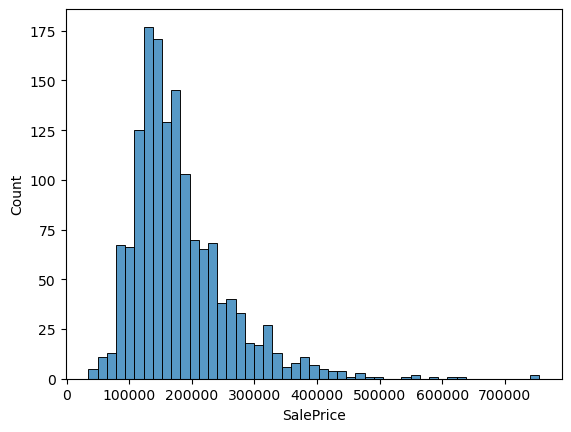

In [49]:
sns.histplot(df,
             x =df['SalePrice']
            )

также найдем мин/макс/среднее значения

In [44]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [40]:
mini=df['SalePrice'].min()
medianochka=df['SalePrice'].median()
maximal=df['SalePrice'].max()

print(f"минимальная стоимсоть: {mini}")
print(f"медианная стоимсоть: {medianochka}")
print(f"максимальная стоимсоть: {maximal}")

минимальная стоимсоть: 34900
медианная стоимсоть: 163000.0
максимальная стоимсоть: 755000


на основе полученных данных сделаем разбиение цены на рынке недвижимости чудесного города Эймса

In [112]:
def sale_groups(i):
  if i['SalePrice']<79442:
    return 'low price'
  if (i['SalePrice']>=79442)&(i['SalePrice']<129975):
    return 'below avg price'
  if (i['SalePrice']>=129975)&(i['SalePrice']<163000):
    return 'avg price'
  if (i['SalePrice']>=163000)&(i['SalePrice']<214000):
    return 'above avg price'
  if (i['SalePrice']>=214000)&(i['SalePrice']<300000):
    return 'high price'
  if i['SalePrice']>=300000:
    return 'crazy price'


добавим новую колонку в датасет

In [113]:
df_new= df
df_new['Price level']=df.apply(sale_groups, axis=1)
df_new

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Price level,PropertyAge
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,NaN,NaN,0,1,2008,New,Partial,160000,avg price,0
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,0,10,2007,New,Partial,184750,above avg price,0
1442,1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2009,WD,Normal,310000,crazy price,1
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,7,2008,WD,Normal,325000,crazy price,115
994,995,20,RL,96.0,12456,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,7,2009,WD,Normal,337500,crazy price,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,10,2006,WD,Abnorml,35311,low price,57
636,637,30,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,1,2009,ConLw,Normal,60000,low price,73
1100,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,NaN,NaN,0,1,2009,WD,Normal,60000,low price,89
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,...,NaN,NaN,0,1,2007,WD,Normal,39300,low price,61


Далее предлагаю проанализировать тип жилья с их средней стоимостью


In [81]:
#тип жилья
property_type = df_new['BldgType'].value_counts()
print(property_type)

#средняя цена по типу жилья
property_prices = df_new.groupby('BldgType')['SalePrice'].mean()
print(property_prices)

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64
BldgType
1Fam      185763.807377
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
Name: SalePrice, dtype: float64


<Axes: title={'center': 'Distribution of Building Types'}, xlabel='BldgType', ylabel='Count'>

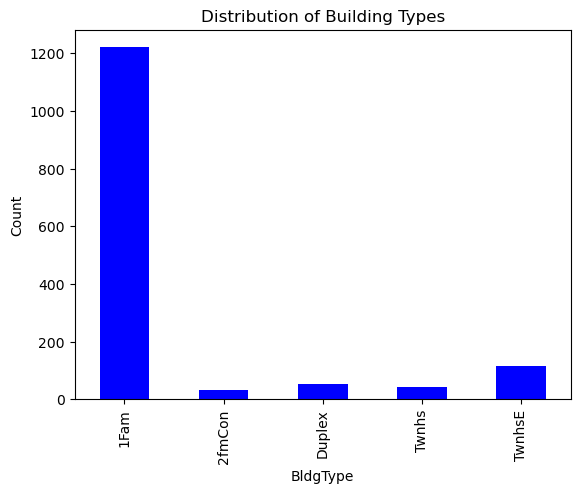

In [85]:
#строим график по типу жилья
df_new.groupby(df['BldgType']).size().plot(kind = 'bar', 
                                       title='Distribution of Building Types',
                                       xlabel='BldgType', 
                                       ylabel='Count',
                                       color='blue')

<Axes: title={'center': 'Average Sale Price by Building Type'}, xlabel='BldgType', ylabel='Price'>

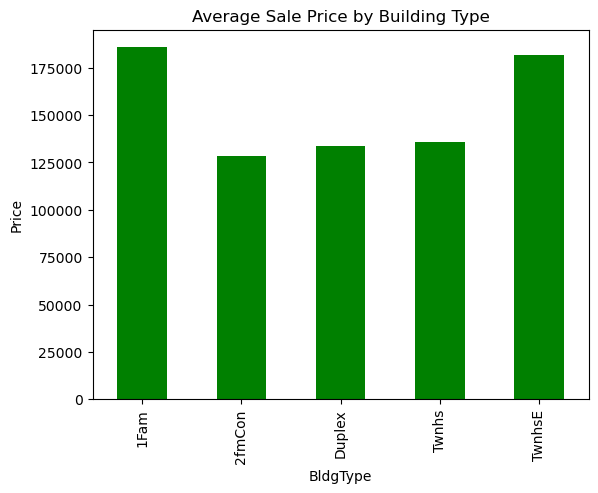

In [86]:
#строим график по средней стоимости каждого типа жилья
df_new.groupby('BldgType')['SalePrice'].mean().plot(kind = 'bar',
                                                title='Average Sale Price by Building Type',
                                                xlabel='BldgType', 
                                                ylabel='Price',
                                                color='green')


У нас очень ловко получилось построить графики)

На данном этапе мы знаем распределение по типам жилья - какое кол-во домов каждого типа у нас есть; также мы получили информацию о средней стоимости домов каждого типа 

Теперь есть идея протестировать несколько гипотез на основе данного датасета:
1) чем новее дом, тем он стоит дороже
2) невозможно найти "хороший" (OverallQual) по качеству  дом по адекватной стоимости, для упрощения адекватной ценой будем считать avg price и above avg price
3) чем дороже дом, тем выше его общее состояние (OverallCond)
4) чем больше жилая площадь, тем дорорже стоимость 
5) объект недвижимости с фундаментом из кирпича обладают наибольшей ценой по сравнению с остальными типами фундамента
6) чем выше качество кухни, тем выше оценка качества объекта недвижимости 


Найдем возраст домов и добавим новую колонку в табличку

In [88]:
#создаем новую колонку
df_new['PropertyAge'] = df_new['YrSold'] - df_new['YearBuilt']
df_new

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Price level,PropertyAge
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,above avg price,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,above avg price,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,high price,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,avg price,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,high price,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000,above avg price,8
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,above avg price,32
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,high price,69
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,142125,avg price,60


Text(0, 0.5, 'SalePrice')

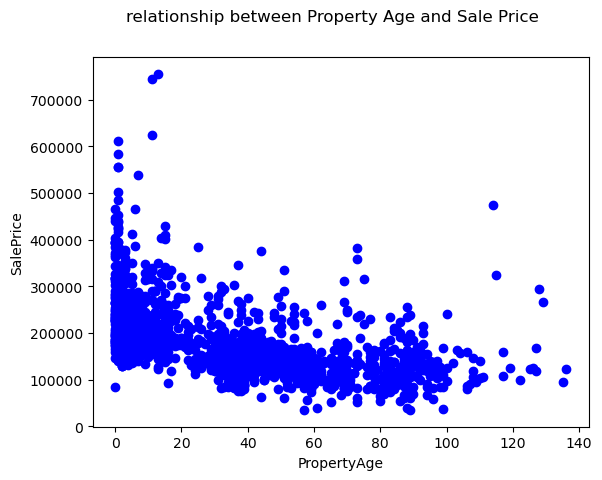

In [89]:
#строим график отношения возраста к цене
plt.scatter(df_new["PropertyAge"],df['SalePrice'], color='blue')
plt.suptitle('relationship between Property Age and Sale Price')
plt.xlabel("PropertyAge")
plt.ylabel('SalePrice')

Анализируя график, можно сказать, что наблюдается отрицательная тенденция. В основном старые дома продаются по более низким ценам, чем новые. Конечно, имееются исключения, однако в общем случае новые дома дороже старых. Данный факт подтверждает первую гипотезу.

Перейдем ко второй гипотезе 

In [115]:
#сортируем датасет по OverallCond
df_sor1=df_new.sort_values('OverallCond', ascending=False)[:15]
df_sor2=df_sor1.sort_values('SalePrice', ascending=True)
df_sor2 = df_sor2.reset_index(drop=True)
df_sorted=df_sor2[['SalePrice','OverallCond', 'OverallQual', 'Price level']]
df_sorted

,SalePrice,OverallCond,OverallQual,Price level
0,110500,9,5,below avg price
1,118000,9,5,below avg price
2,134900,9,6,avg price
3,140000,9,5,avg price
4,143000,9,7,avg price
5,145000,9,4,avg price
6,155000,9,7,avg price
7,161000,9,7,avg price
8,168000,9,8,above avg price
9,178400,9,7,above avg price


 Данная таблица показывает первые 15 объектов недвижимости с наивысшей оценкой общего состояния и по минимальныой цене (OverallQual). Это факт дает нам надежду на возможность покупки дома по avg цене и с хорошей по качеству оценке. Продолжаем анализ. 

In [95]:
#сортируем датасет по OverallQual
df=df_new.sort_values(['OverallQual', 'SalePrice'], ascending=[False, True])
df_n=df[['OverallQual','OverallCond', 'SalePrice', "Price level" ]] 
df_n[:30]

,OverallQual,OverallCond,SalePrice,Price level
1298,10,5,160000,avg price
523,10,5,184750,above avg price
1442,10,5,310000,crazy price
583,10,9,325000,crazy price
994,10,5,337500,crazy price
825,10,5,385000,crazy price
224,10,5,386250,crazy price
515,10,5,402861,crazy price
389,10,5,426000,crazy price
58,10,5,438780,crazy price


Данная таблица свидетельствует о том, что представляется возможным найти недвижимость по средней стоимости и с  хорошей по качеству оценке. Тем самым гипотеза о невозможности найти является ошибочной. 

переходим к гипотезе 3

Text(0, 0.5, 'OverallCond')

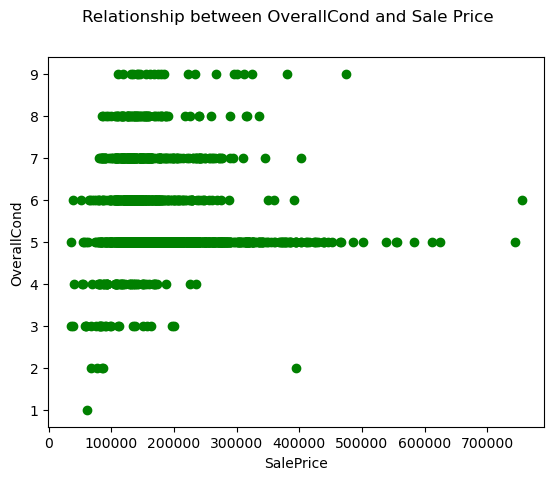

In [98]:
#строим график отношения OverallCond к цене
plt.scatter(df['SalePrice'],df['OverallCond'], color='green') 
plt.suptitle('Relationship between OverallCond and Sale Price')
plt.xlabel('SalePrice')
plt.ylabel('OverallCond')

Анализируя график, можно сказать, что наша гипотеза о том, что с ростом цены, также растет и OverallCond, не является состоятельной. Так легко заметить, что больше всего объектов недвижимости имеют оценку "5" вне зависимости от цены. Также мы видим, что наивысшую оценку "9" получают объекты с ценой и ниже, чем объеты с оценкой "5". Например, недвижимость в районе стоимости 300 000 усл ед имеет разброс в оценке от "5" до "9". Тем самым нет зависимости роста цены и роста оценки.

Далее гипотеза 4

Text(0, 0.5, 'LivArea')

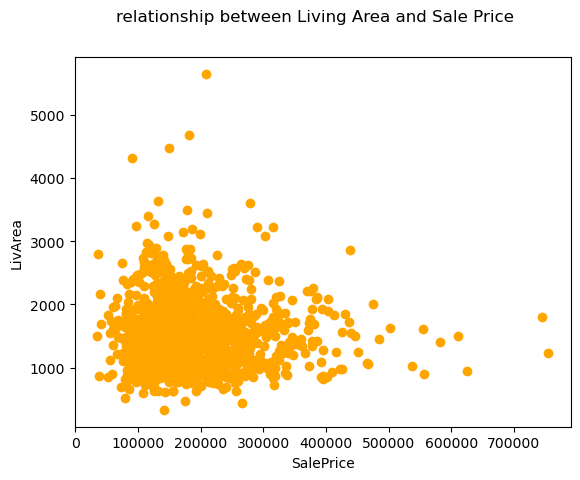

In [103]:
#строим график отношения Living Area к цене
plt.scatter(df_new['SalePrice'],df["GrLivArea"], color='orange')
plt.suptitle('relationship between Living Area and Sale Price')
plt.xlabel('SalePrice')
plt.ylabel("LivArea")

Анализируя график, можно сказать, что наблюдается положительная тенденция. Чем больше жилая площадь, тем дороже будет стоить объект недвижимости. Данный факт подчиняется логике и подтверждает гипотезу. 

Перейдем к пятой гипотезе 


Text(0.5, 1.0, 'relationship between Foundation and Sale Price')

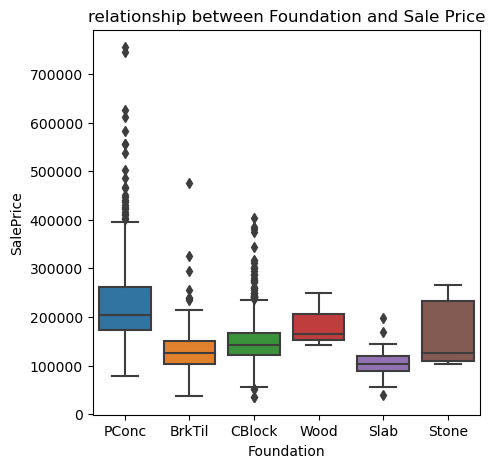

In [124]:
#строим график-усики отношения Foundation к цене
var = 'Foundation'
data = pd.concat([df['SalePrice'], df['Foundation']], axis=1)
f, ax = plt.subplots(figsize=(5, 5))
fig = sns.boxplot(x='Foundation', y='SalePrice', data=data)
plt.title("relationship between Foundation and Sale Price")

In [125]:
#строим таблицу типа фундамента и цены 
pd.pivot_table(df_new,index=['Foundation'], values=['SalePrice'])




,SalePrice
Foundation,
BrkTil,132291.075342
CBlock,149805.714511
PConc,225230.442040
Slab,107365.625000
Stone,165959.166667
Wood,185666.666667


Тем самым наша гипотеза о том, что наибольшую стоимостью обладает фундамент из кирпича, не является справедливой. По таблице и графику таким фундаментом с наибольшей стоимостью является бетонный вариант - PConc

И осталось рассмотреть последнюю гипотезу

Text(0.5, 1.0, 'relationship between OverallCond and KitchenQual')

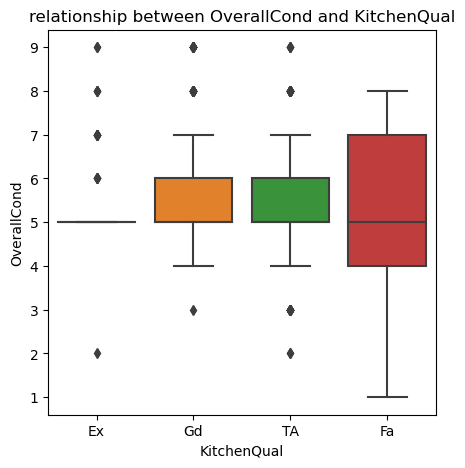

In [136]:
#строим график-усики отношения KitchenQual к OverallCond
var = 'KitchenQual'
data = pd.concat([df['OverallCond'], df["KitchenQual"]], axis=1)
f, ax = plt.subplots(figsize=(5, 5))
fig = sns.boxplot(x="KitchenQual", y="OverallCond", data=data)
plt.title("relationship between OverallCond and KitchenQual")

По данному графику весьма затруднительно сказать подтверждается ли гипотеза о том, что "чем выше качество кухни, тем выше оценка качества объекта недвижимости" или нет. Мы видим, что при оценке FA оценка качества имеет разброс 4-7 (относит среднего), а при наивысшем значении EX строго 5. 

Построим табличку кор-ции по нашим наблюдениям 

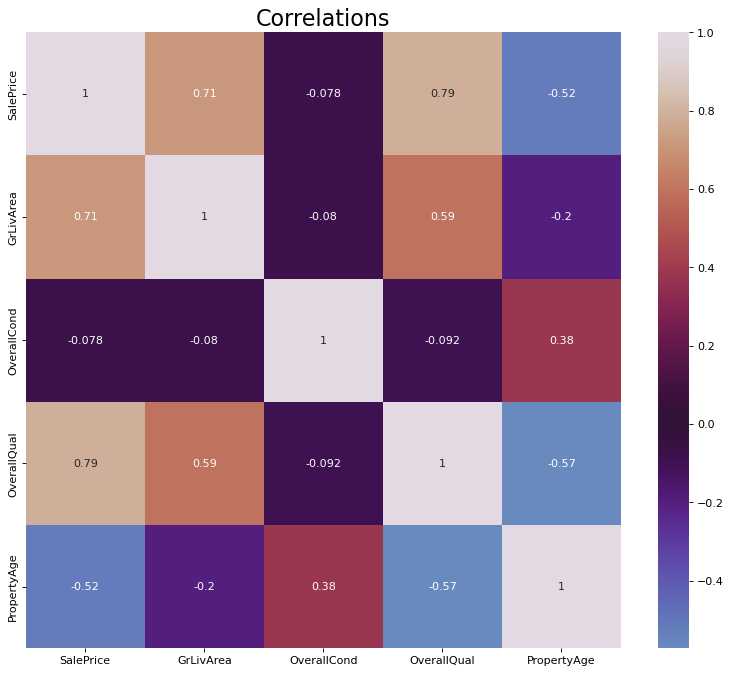

In [135]:
#строим табличку кор-ции с нашими наблюдениями 
df_final=df[['SalePrice','GrLivArea','OverallCond','OverallQual','PropertyAge']]
df_final
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_n.corr(), xticklabels=df_n.corr().columns, yticklabels=df_n.corr().columns, cmap='twilight', center=0, annot=True)

plt.title('Correlations', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

На последок интересно также узнать как меняется средняя цена год от года продажи

In [121]:
SalePrice_avgbyYears = df.groupby('YrSold')['SalePrice'].mean()
SalePrice_avgbyYears

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Avg price by years')

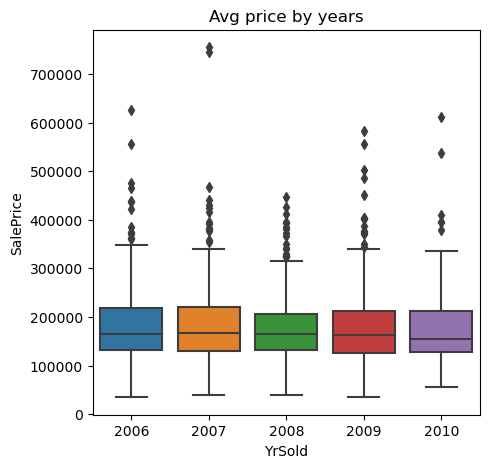

In [127]:
#строим график - усики  изменения средней цены по годам 
var = 'SalePrice'
data = pd.concat([df_new['YrSold'], df['SalePrice']], axis=1)
f, ax = plt.subplots(figsize=(5, 5))
fig = sns.boxplot(x='YrSold', y="SalePrice", data=data)
plt.title("Avg price by years")

Интерсно заметить, что среднее значение цены остается примерно на одном уровне. 

# **Выводы**

>**Итоги**:
*   Поработали с датасетом
*   Сформировали гипотезы и протестировали их 
*   Провели анализ (построили графики/таблицы и сделали выводы)

> Подытоживая проведённый анализ, можно сказать насколько были верны наши гипотезы.


**Подтвердились:**

_1. чем новее дом, тем он стоит дороже

_4.чем больше жилая площадь, тем дорорже стоимость

**Опроверглись:**

_2.невозможно найти "хороший" (OverallQual) по качеству дом по адекватной стоимости,  для упрощения адекватной ценой будем считать avg price и above avg price

_3.чем дороже дом, тем выше его общее состояние (OverallCond)

_5.объект недвижимости с фундаментом из кирпича обладают наибольшей ценой по сравнению с остальными типами фундамента

_6.чем выше качество кухни, тем выше оценка качества объекта недвижимости



Приятная новость состоит в том, что всегда есть возможность купить хороший дом и по приятной цене! Осталось только заработать, оформить визу  и можно пепреезжать в чудесный город Эймс


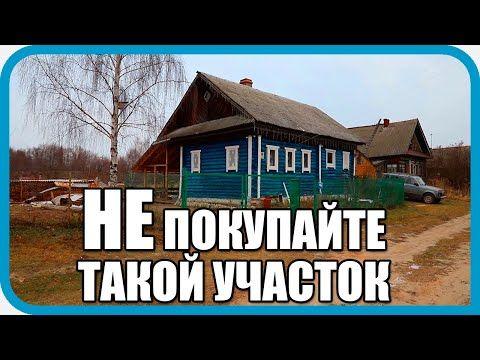

In [97]:
from IPython.display import Image
Image("3c0788b377908d19f7bb04f140ba2089.jpg", width=600, height=300)
